<a href="https://colab.research.google.com/github/nuthanan06/CxCDatathon/blob/main/CxCHackathon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Analyzing Relationship Between Profit and Number of Workers

**Preprocessing data set**

Due to the large complexity of the dataset, we will analyze the first venue to provide a good representation of how it works.


In [ ]:
import csv

bills = "bills.csv"
venues = "venues.csv"

fieldsVenues = []
rowsVenues = []

fieldsBills = []
rowsBills = []


with open(venues, 'r') as csvfile:
    # creating a csv reader object
    csvreader = csv.reader(csvfile)

    # extracting field names through first row
    fieldsVenues = next(csvreader)

    # extracting each data row one by one
    rowsVenues = next(csvreader)
    rowsVenues = next(csvreader)
    rowsVenues = next(csvreader)
    rowsVenues = next(csvreader)

    # get total number of rows

with open(bills, 'r') as csvfile:
    # creating a csv reader object
    csvreader = csv.reader(csvfile)

    fieldsBills = next(csvreader)

    for row in csvreader:
      if (rowsVenues[0] == row[18]):
        rowsBills.append(row)

    print("Total no. of rows bills: %d" % len(rowsBills))


Total no. of rows bills: 6316


We want to get the total revenue gained per day without tax, let's use a dictionary to help with the data sorting and print out the total revenue gained per day.

In [ ]:
dictRevenue = {}

for x in rowsBills:
  if x[8] in dictRevenue:
    dictRevenue[x[8]] += round(float(x[1]) - float(x[5]), 2)
  else:
    dictRevenue[x[8]] =  round(float(x[1]) - float(x[5]), 2)

sortedDict = dict(sorted(dictRevenue.items()))
print(sortedDict)

{'2024-07-17': 0.0, '2024-07-19': 1310.4400000000005, '2024-07-20': 1435.2200000000007, '2024-07-21': 1449.1300000000008, '2024-07-22': 1062.0200000000004, '2024-07-23': 1079.3100000000002, '2024-07-24': 1102.0800000000004, '2024-07-25': 893.5000000000005, '2024-07-26': 1237.6400000000008, '2024-07-27': 1726.0100000000014, '2024-07-28': 881.0700000000002, '2024-07-29': 434.4800000000002, '2024-07-30': 655.7400000000002, '2024-07-31': 1096.8700000000003, '2024-08-01': 761.2800000000003, '2024-08-02': 1205.0100000000007, '2024-08-03': 1271.5900000000006, '2024-08-04': 1428.1300000000008, '2024-08-05': 673.3300000000002, '2024-08-06': 912.2600000000003, '2024-08-07': 908.5100000000003, '2024-08-08': 1120.2600000000007, '2024-08-09': 1122.7800000000004, '2024-08-10': 1499.240000000001, '2024-08-11': 1051.8200000000006, '2024-08-12': 579.3300000000002, '2024-08-13': 1013.6900000000004, '2024-08-14': 1083.1000000000006, '2024-08-15': 856.8100000000003, '2024-08-16': 1572.3800000000012, '2024

Graph the results for the restuarant

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

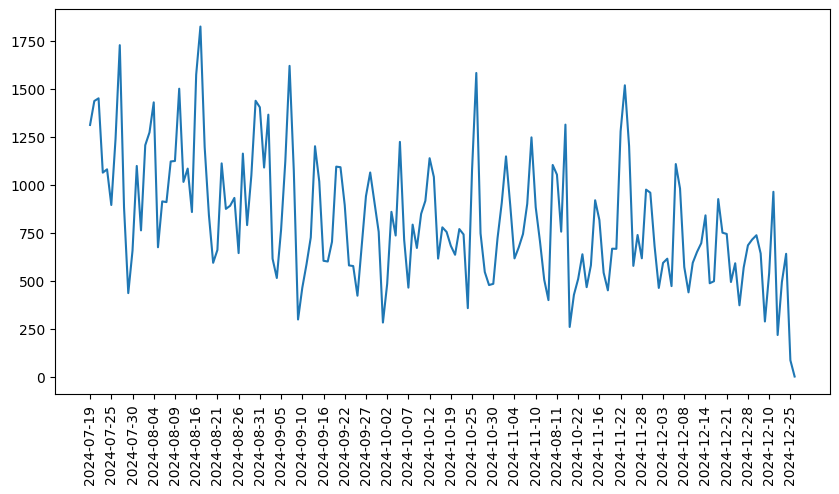

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

key = list(dictRevenue.keys())
val = list(dictRevenue.values())

npKeys = np.array(key)
npVal = np.array(val)

fig, ax = plt.subplots(figsize=(10, 5))

ax.set_xticks(np.arange(0, len(npKeys), 5))
ax.set_xticklabels(npKeys[::5], rotation=90)

ax.plot(npKeys, npVal)

plt.show()


# Finding Workers and Hours

In order to calculate the profit, we need to calculate the number of workers and hours completed based on the minimum wage of the state and province in order to determine the total profit that is gained.

This led us to the question: **at which profit should we consider as good profit for the restaurant, and when should they start to lay back and at what compensation? **

**Number of Workers Per Day**
We start by finding the number of workers per day based on the id, when their first order was, to when their last order was. We can use a similar process as in the dictionary.

**ASSUMPTION**: workers only do one table a time, the final table that they serve is the final hour they completed.

In [ ]:
from datetime import datetime

workerHours = {}

for x in rowsBills:
    date = x[0].split(" ")[0]
    worker_id = x[8]
    shift_date = x[19]
    start_time = datetime.strptime(x[10].split(" ")[1], "%H:%M:%S")
    end_time = datetime.strptime(x[11].split(" ")[1], "%H:%M:%S")

    if end_time > start_time:
        if worker_id not in workerHours:
            workerHours[worker_id] = {}

        if shift_date not in workerHours[worker_id]:
            workerHours[worker_id][shift_date] = [start_time, end_time]
        else:
            if start_time < workerHours[worker_id][shift_date][0]:
              workerHours[worker_id][shift_date][0] = start_time
            if end_time > workerHours[worker_id][shift_date][1]:
              workerHours[worker_id][shift_date][1] = end_time

for date, workers in workerHours.items():
    for worker_id, times in workers.items():
        workerHours[date][worker_id] = [t.strftime("%H:%M:%S") for t in times]

print(workerHours['2024-08-16'])

{'1a547c4a-819b-4c18-a031-c3ec68487d93': ['11:14:55', '15:57:09'], '5090d285-1f42-4d2b-a5bf-7d130f6e33e1': ['19:29:00', '21:15:35'], 'c5db16ca-2af6-4b96-ac82-7fbba2d17464': ['16:40:00', '19:00:25'], '99b14532-6ded-49c3-a41a-1294f07224b8': ['16:10:04', '22:27:46'], '53843602-f6b0-45f5-abf6-2783038180cd': ['12:09:00', '17:07:54']}


Here I noticed that there could be some sort of outliers with regards to the data, therefore I decided to a check before hand with new code.

Now we calculate the total cost of all the workers.

In [ ]:
for x in workerHours:
    newCost = 0
    for y in workerHours[x]:
      newCost += 17.30 * (int(workerHours[x][y][1][0:2]) - int(workerHours[x][y][0][0:2]) + 1)
    workerHours[x] = newCost

print(workerHours['2024-08-16'])


432.50000000000006


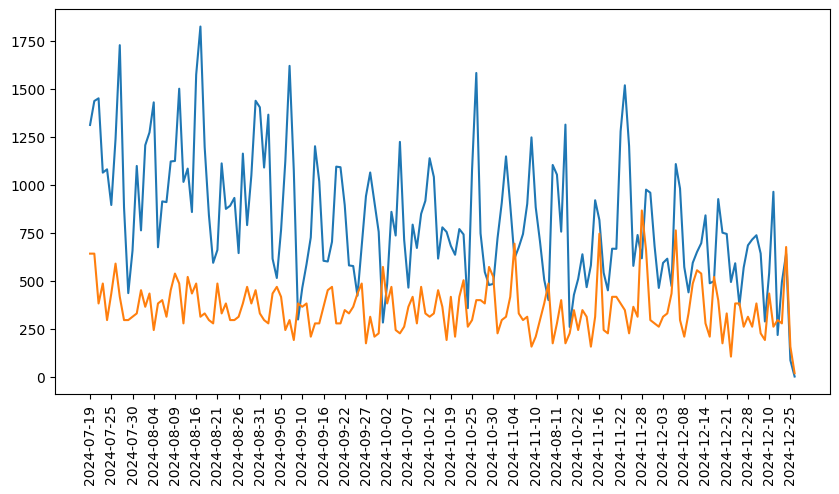

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

key = list(dictRevenue.keys())
val = list(dictRevenue.values())
moneyVals = list(workerHours.values())

npKeys = np.array(key)
npVal = np.array(val)
npMoneyVals = np.array(moneyVals)

fig, ax = plt.subplots(figsize=(10, 5))

ax.set_xticks(np.arange(0, len(npKeys), 5))
ax.set_xticklabels(npKeys[::5], rotation=90)

ax.plot(npKeys, npVal)
ax.plot(npKeys, npMoneyVals)

plt.show()


We now plot the difference between both lines and analyze the break even points.

2024-09-09
2024-09-25
2024-10-01
2024-10-29
2024-10-30
2024-11-04
2024-11-13
2024-11-28
2024-12-18
2024-12-24
2024-12-17
2024-12-26
2024-12-25
2024-07-17


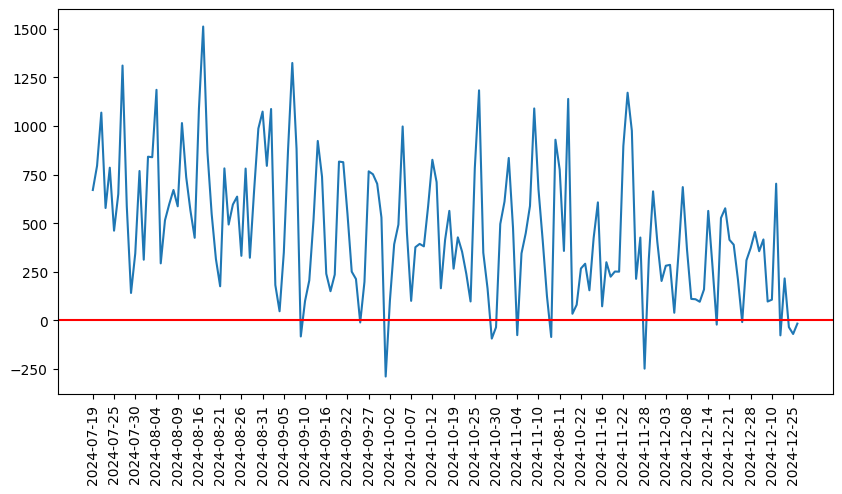

In [ ]:
differenceVals = []

for x in range(len(val)):
  differenceVals.append(val[x] - moneyVals[x])
  if (val[x] - moneyVals[x] < 0):
    print(key[x])

npDiff = np.array(differenceVals)


fig, ax = plt.subplots(figsize=(10, 5))

ax.set_xticks(np.arange(0, len(npKeys), 5))
ax.set_xticklabels(npKeys[::5], rotation=90)

ax.plot(npKeys, npDiff)
plt.axhline(y = 0, color = 'r', linestyle = '-')

plt.show()
#

# All Venue Analysis

Based on this idea, we want to create a model that will be able to determine when a place is being overstaffed or not and how much it needs to cut down by in order to achieve such. We will write the same code and see the trend for all venues.


Processing bill 0...
Processing bill 10000...
Processing bill 20000...
Processing bill 30000...
Processing bill 40000...
Processing bill 50000...
Processing bill 60000...
Processing bill 70000...
Processing bill 80000...
Processing bill 90000...
Processing bill 100000...
Processing bill 110000...
Processing bill 120000...
Processing bill 130000...
Processing bill 140000...
Processing bill 150000...
Processing bill 160000...
Processing bill 170000...
Processing bill 180000...
Processing bill 190000...
Processing bill 200000...
Processing bill 210000...
Processing bill 220000...
Processing bill 230000...
Processing bill 240000...
Processing bill 250000...
Processing bill 260000...
Processing bill 270000...
Processing bill 280000...
Processing bill 290000...
Processing bill 300000...
Processing bill 310000...
Processing bill 320000...
Processing bill 330000...
Processing bill 340000...
Processing bill 350000...
Processing bill 360000...
Processing bill 370000...
Processing bill 380000...


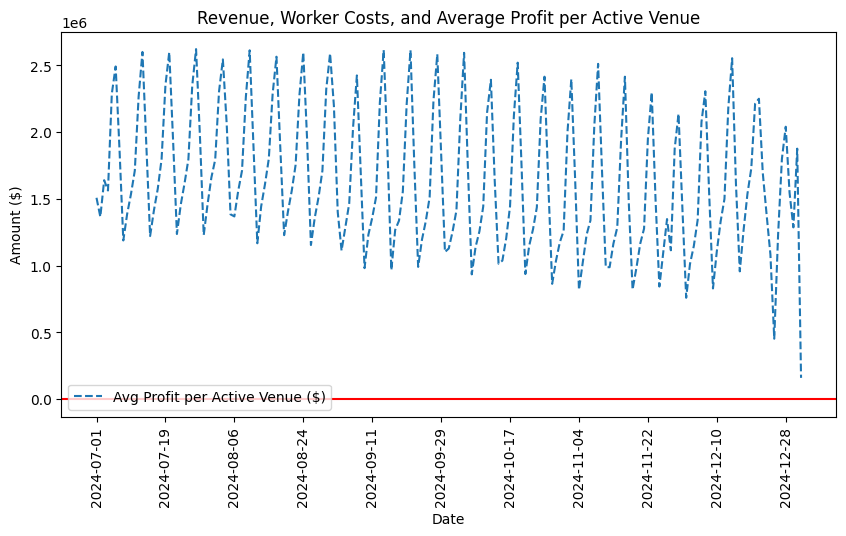

In [ ]:
import csv
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np

# File names
bills_file = "bills.csv"
venues_file = "venues.csv"

# Initialize revenue and worker costs
dictRevenue = {}
workerCosts = {}
hourly_rate = 17.30  # Hourly wage

# Step 1: Read `venues.csv` into a set (small memory footprint)
venue_ids = set()
with open(venues_file, 'r') as venue_file:
    csvreader = csv.reader(venue_file)
    next(csvreader)  # Skip headers
    for venue_row in csvreader:
        venue_ids.add(venue_row[0])  # Store venue ID

# Step 2: Process `bills.csv` with enumeration
active_venues = set()  # Track only venues that have transactions
with open(bills_file, 'r') as bills_file_obj:
    csvreader = csv.reader(bills_file_obj)
    headers = next(csvreader)  # Skip headers

    for index, row in enumerate(csvreader):
        if index % 10000 == 0:
            print(f"Processing bill {index}...")  # Print progress every 10k rows

        venue_id = row[18]  # Venue ID column
        if venue_id not in venue_ids:  # Skip if venue not needed
            continue

        active_venues.add(venue_id)  # Only add venues with transactions
        date = row[0].split(" ")[0]  # Extract date
        worker_id = row[8]

        # Update revenue
        revenue = round(float(row[1]) - float(row[5]), 2)
        dictRevenue[date] = dictRevenue.get(date, 0) + revenue

        # Process worker hours
        start_time = datetime.strptime(row[10].split(" ")[1], "%H:%M:%S")
        end_time = datetime.strptime(row[11].split(" ")[1], "%H:%M:%S")

        if end_time > start_time:
            if date not in workerCosts:
                workerCosts[date] = {}

            if worker_id not in workerCosts[date]:
                workerCosts[date][worker_id] = [start_time, end_time]
            else:
                workerCosts[date][worker_id][0] = min(workerCosts[date][worker_id][0], start_time)
                workerCosts[date][worker_id][1] = max(workerCosts[date][worker_id][1], end_time)

# Compute total worker cost per day
finalWorkerCosts = {}

for date, workers in workerCosts.items():
    total_cost = sum(
        hourly_rate * ((times[1] - times[0]).total_seconds() / 3600)
        for times in workers.values()
    )
    finalWorkerCosts[date] = round(total_cost, 2)

# Ensure active venues are considered
num_active_venues = max(len(active_venues), 1)  # Avoid division by zero

# Convert to sorted lists for plottingA
dates = sorted(dictRevenue.keys())
print(dates)
revenue_values = [dictRevenue.get(date, 0) for date in dates]
worker_cost_values = [finalWorkerCosts.get(date, 0) for date in dates]
profit_values = [(rev - cost) for rev, cost in zip(revenue_values, worker_cost_values)]  # ✅ Only active venues

# Plot data
fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(dates, profit_values, label="Avg Profit per Active Venue ($)", linestyle="dashed")  # Updated label

ax.set_xticks(np.arange(0, len(dates), max(1, len(dates)//10)))  # Avoid label clutter
ax.set_xticklabels(dates[::max(1, len(dates)//10)], rotation=90)

plt.axhline(y=0, color='r', linestyle='-')  # Reference line for profit/loss
plt.legend()
plt.xlabel("Date")
plt.ylabel("Amount ($)")
plt.title("Revenue, Worker Costs, and Average Profit per Active Venue")
plt.show()


Based on this graph, we still have certain operating costs that need to be dealt with, such as the cost of food.

We assume that the average profit that can be earned is around 2 million dollars, we now want to optimize our employment rates or costs based on reach that threshold.

https://www.touchbistro.com/blog/restaurant-operating-costs/#subheading=7

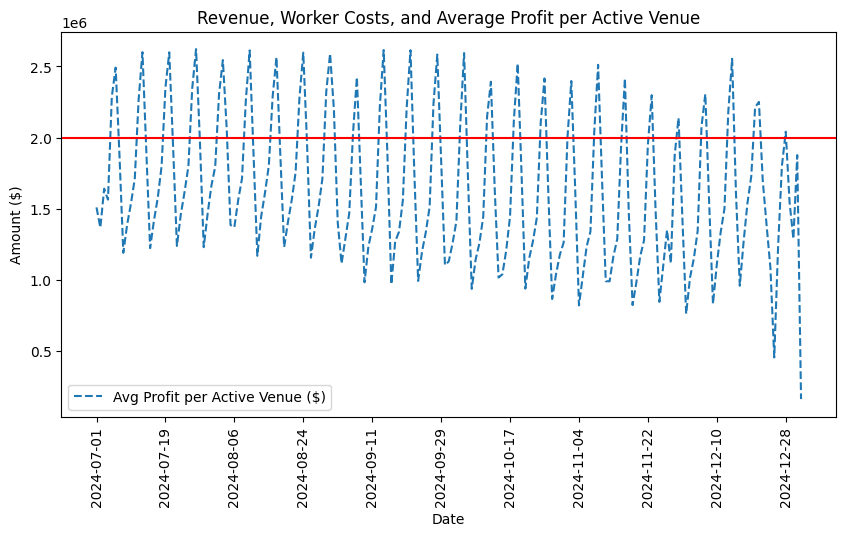

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(dates, profit_values, label="Avg Profit per Active Venue ($)", linestyle="dashed")  # Updated label

ax.set_xticks(np.arange(0, len(dates), max(1, len(dates)//10)))  # Avoid label clutter
ax.set_xticklabels(dates[::max(1, len(dates)//10)], rotation=90)

plt.axhline(y=2000000, color='r', linestyle='-')  # Reference line for profit/loss
plt.legend()
plt.xlabel("Date")
plt.ylabel("Amount ($)")
plt.title("Revenue, Worker Costs, and Average Profit per Active Venue")
plt.show()


# Model Building

Processing bill 0...
Processing bill 10000...
Processing bill 20000...
Processing bill 30000...
Processing bill 40000...
Processing bill 50000...
Processing bill 60000...
Processing bill 70000...
Processing bill 80000...
Processing bill 90000...
Processing bill 100000...
Processing bill 110000...
Processing bill 120000...
Processing bill 130000...
Processing bill 140000...
Processing bill 150000...
Processing bill 160000...
Processing bill 170000...
Processing bill 180000...
Processing bill 190000...
Processing bill 200000...
Processing bill 210000...
Processing bill 220000...
Processing bill 230000...
Processing bill 240000...
Processing bill 250000...
Processing bill 260000...
Processing bill 270000...
Processing bill 280000...
Processing bill 290000...
Processing bill 300000...
Processing bill 310000...
Processing bill 320000...
Processing bill 330000...
Processing bill 340000...
Processing bill 350000...
Processing bill 360000...
Processing bill 370000...
Processing bill 380000...


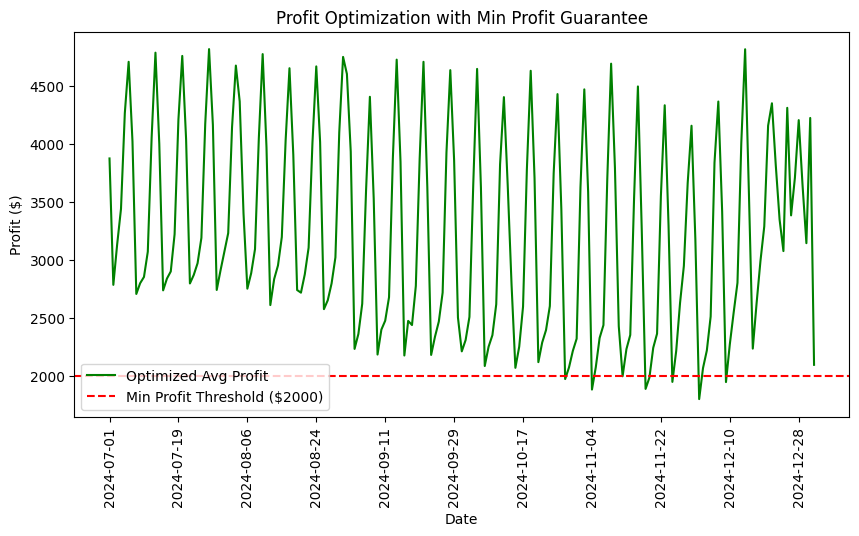


--- Optimization Summary ---
         Date  Avg_Revenue  Avg_Worker_Cost  Optimized_Avg_Worker_Cost  \
0  2024-07-01  3878.755758         1.067069                   1.632506   
1  2024-07-02  2788.241143         1.607571                   1.650950   
2  2024-07-03  3137.585660         1.533098                   1.645041   
3  2024-07-04  3443.980947         1.549273                   1.639859   
4  2024-07-05  4270.326530         1.515858                   1.625883   
5  2024-07-06  4712.623403         1.532042                   1.618402   
6  2024-07-07  4025.769657         1.708197                   1.630019   
7  2024-07-08  2709.492733         1.837312                   1.652282   
8  2024-07-09  2802.110606         1.593212                   1.650715   
9  2024-07-10  2856.286636         1.474517                   1.649799   

    Avg_Profit  Optimized_Avg_Profit  
0  3877.688689           3877.123253  
1  2786.633571           2786.590193  
2  3136.052562           3135.940618  

In [ ]:
import csv
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

# File names
bills_file = "bills.csv"
venues_file = "venues.csv"

# Initialize revenue and worker costs
dictRevenue = {}
workerCosts = {}
dailyVenues = {}  # Track active venues per day
hourly_rate = 17.30  # Hourly wage

# Step 1: Read `venues.csv` into a set
venue_ids = set()
with open(venues_file, 'r') as venue_file:
    csvreader = csv.reader(venue_file)
    next(csvreader)  # Skip headers
    for venue_row in csvreader:
        venue_ids.add(venue_row[0])  # Store venue ID

# Step 2: Process `bills.csv`
with open(bills_file, 'r') as bills_file_obj:
    csvreader = csv.reader(bills_file_obj)
    headers = next(csvreader)  # Skip headers

    for index, row in enumerate(csvreader):
        if index % 10000 == 0:
            print(f"Processing bill {index}...")  # Print progress every 10k rows

        venue_id = row[18]  # Venue ID column
        if venue_id not in venue_ids:  # Skip if venue not needed
            continue

        date = row[0].split(" ")[0]  # Extract date
        worker_id = row[8]

        # Track venues active on this day
        if date not in dailyVenues:
            dailyVenues[date] = set()
        dailyVenues[date].add(venue_id)

        # Update revenue
        revenue = round(float(row[1]) - float(row[5]), 2)
        dictRevenue[date] = dictRevenue.get(date, 0) + revenue

        # Process worker hours
        start_time = datetime.strptime(row[10].split(" ")[1], "%H:%M:%S")
        end_time = datetime.strptime(row[11].split(" ")[1], "%H:%M:%S")

        if end_time > start_time:
            if date not in workerCosts:
                workerCosts[date] = {}

            if worker_id not in workerCosts[date]:
                workerCosts[date][worker_id] = [start_time, end_time]
            else:
                workerCosts[date][worker_id][0] = min(workerCosts[date][worker_id][0], start_time)
                workerCosts[date][worker_id][1] = max(workerCosts[date][worker_id][1], end_time)

# Compute total worker cost per day
finalWorkerCosts = {}
for date, workers in workerCosts.items():
    total_cost = sum(
        hourly_rate * ((times[1] - times[0]).total_seconds() / 3600)
        for times in workers.values()
    )
    finalWorkerCosts[date] = round(total_cost, 2)

# Compute per-venue averages
dates = sorted(dictRevenue.keys())
avg_revenue_values = []
avg_worker_cost_values = []

for date in dates:
    num_venues = max(len(dailyVenues.get(date, [])), 1)  # Get venues active on this date
    avg_revenue_values.append(dictRevenue[date] / num_venues)
    avg_worker_cost_values.append(finalWorkerCosts.get(date, 0) / num_venues)

# Compute per-venue profit
avg_profit_values = [(rev - cost) for rev, cost in zip(avg_revenue_values, avg_worker_cost_values)]

# Convert to DataFrame
df = pd.DataFrame({
    "Date": dates,
    "Avg_Revenue": avg_revenue_values,
    "Avg_Worker_Cost": avg_worker_cost_values
})

df["Avg_Profit"] = df["Avg_Revenue"] - df["Avg_Worker_Cost"]

# Train Ridge Regression model
X = df[["Avg_Revenue"]]
y = df["Avg_Worker_Cost"]

if len(df) > 10:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
else:
    X_train, y_train = X, y  # Use full dataset for training
    X_test, y_test = X, y  # Avoid split for tiny datasets

model = Ridge(alpha=0.5)
model.fit(X_train, y_train)
df["Predicted_Avg_Worker_Cost"] = model.predict(X)

# Adjust worker costs to guarantee a minimum profit threshold
df["Optimized_Avg_Worker_Cost"] = np.maximum(
    np.where(
        df["Avg_Revenue"] - df["Predicted_Avg_Worker_Cost"] < 2000,  # Ensure profit >= 2000
        df["Avg_Revenue"] - 2000,  # Reduce worker costs
        df["Predicted_Avg_Worker_Cost"]  # Otherwise, keep predicted value
    ),
    0  # Prevent negative costs
)

df["Optimized_Avg_Profit"] = df["Avg_Revenue"] - df["Optimized_Avg_Worker_Cost"]

# Evaluate model performance
if len(df) > 10:
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    print(f"Model MAE: ${mae:.2f}")

# Plot results
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(df["Date"], df["Optimized_Avg_Profit"], label="Optimized Avg Profit", linestyle="solid", color="green")
plt.axhline(y=2000, color='r', linestyle='--', label="Min Profit Threshold ($2000)")
plt.xticks(np.arange(0, len(df["Date"]), max(1, len(df["Date"])//10)), rotation=90)
plt.xlabel("Date")
plt.ylabel("Profit ($)")
plt.title("Profit Optimization with Min Profit Guarantee")
plt.legend()
plt.show()

# Print summary
print("\n--- Optimization Summary ---")
print(df[["Date", "Avg_Revenue", "Avg_Worker_Cost", "Optimized_Avg_Worker_Cost", "Avg_Profit", "Optimized_Avg_Profit"]].head(10))


Here, I noticed that there was something particularly wrong with the code, in which it doesn't take into consideration any venue that is closed for the day, hence I scrapped the model and considered finding the proportion of workers that would need to be assigned for one particular day below.

In [ ]:
import csv
import pandas as pd
import numpy as np
from datetime import datetime
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

# File paths (update as needed)
bills_file = "bills.csv"
venues_file = "venues.csv"

# Initialize storage-efficient data structures
daily_worker_counts = {}
daily_total_workers = set()

# Read `venues.csv` to track valid venue IDs (small memory footprint)
valid_venues = set()
with open(venues_file, 'r') as f:
    reader = csv.reader(f)
    next(reader)  # Skip header
    for row in reader:
        valid_venues.add(row[0])  # Assuming Venue_ID is in column 0

# Read `bills.csv` efficiently
with open(bills_file, 'r') as f:
    reader = csv.reader(f)
    headers = next(reader)  # Read header
    date_idx =  headers.index("bill_paid_at_local")  # Extract date
    worker_idx = headers.index("waiter_uuid")
    venue_idx = headers.index("venue_xref_id")

    for row in reader:
        date = row[date_idx].split(" ")[0]  # Extract date
        worker_id = row[worker_idx]
        venue_id = row[venue_idx]

        # Only process if venue is valid
        if venue_id in valid_venues:
            daily_worker_counts.setdefault(date, set()).add(worker_id)
            daily_total_workers.add(worker_id)  # Track unique total workers

# Convert to proportion data
dates = sorted(daily_worker_counts.keys())
total_workers = len(daily_total_workers)  # Total distinct workers across all dates

# Create a DataFrame
df = pd.DataFrame({
    "Date": dates,
    "Workers_Assigned": [len(daily_worker_counts[d]) for d in dates],
})
df["Worker_Proportion"] = df["Workers_Assigned"] / total_workers  # Compute proportion

# Machine Learning Model: Predict Worker Proportion
X = np.array(df.index).reshape(-1, 1)  # Use time index as feature
y = df["Worker_Proportion"].values  # Target: proportion of workers assigned

# Train-test split (if enough data)
if len(df) > 10:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
else:
    X_train, y_train = X, y
    X_test, y_test = X, y

# Train Ridge Regression model
model = Ridge(alpha=0.5)
model.fit(X_train, y_train)

# Predict worker proportions
df["Predicted_Proportion"] = model.predict(X)

# Evaluate model
if len(df) > 10:
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    print(f"Model MAE: {mae:.4f}")

# Display results
print("\n--- Worker Proportion Prediction ---")
print(df.head(10))


Model MAE: 0.0319

--- Worker Proportion Prediction ---
         Date  Workers_Assigned  Worker_Proportion  Predicted_Proportion
0  2024-07-01              1601           0.174724              0.242738
1  2024-07-02              1867           0.203754              0.242490
2  2024-07-03              2072           0.226127              0.242242
3  2024-07-04              1802           0.196660              0.241994
4  2024-07-05              2479           0.270545              0.241746
5  2024-07-06              2526           0.275674              0.241498
6  2024-07-07              2067           0.225581              0.241250
7  2024-07-08              1588           0.173306              0.241002
8  2024-07-09              1811           0.197643              0.240754
9  2024-07-10              2050           0.223726              0.240506


# 2. Predicting Number of Employees per Hour based on Orders per Hour

First summed up the total order and displayed it on a chart, and then used sckit-learn for regressions.

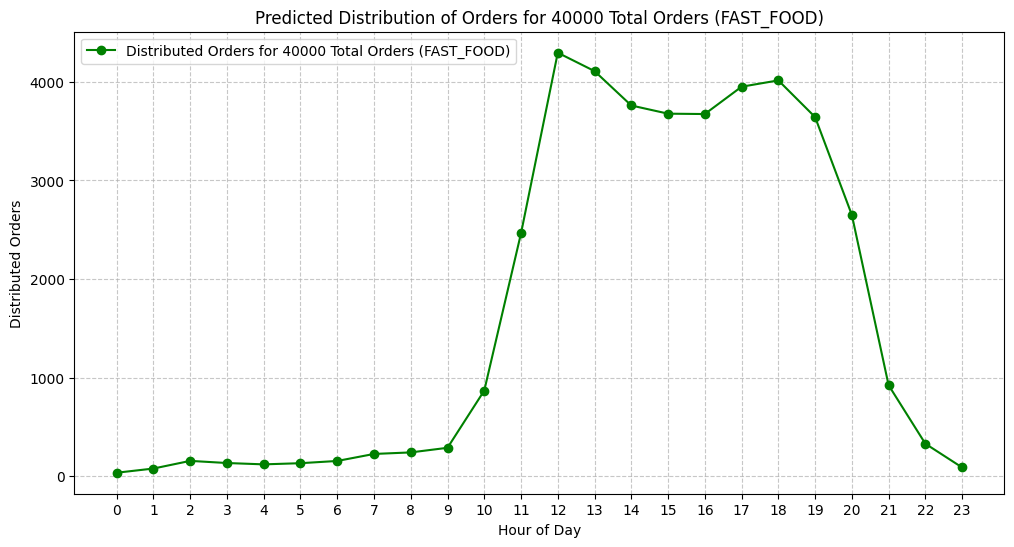

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Function to distribute total orders based on existing hourly distribution pattern
def distribute_orders_based_on_pattern(total_orders, hourly_pattern):
    """
    Distribute total orders across 24 hours based on a given hourly pattern.
    - total_orders: Total orders for the day (test input).
    - hourly_pattern: The hourly order distribution pattern (e.g., from 'FAST_FOOD').
    """
    # Normalize the pattern (ensure the sum of orders equals 1)
    normalized_pattern = hourly_pattern / hourly_pattern.sum()

    # Scale the normalized pattern to match the total orders for the day
    distributed_orders = normalized_pattern * total_orders
    return distributed_orders

# Dataset for 'SPORTS_CLUB'
data_sports_club = {
    'concept': ['SPORTS_CLUB'] * 24,
    'hour_of_day': list(range(24)),
    'total_orders': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 0, 6, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0]
}
df_sports_club = pd.DataFrame(data_sports_club)

# Dataset for 'POP_UP'
data_pop_up = {
    'concept': ['POP_UP'] * 24,
    'hour_of_day': list(range(24)),
    'total_orders': [0, 0, 0, 0, 0, 0, 0, 0, 9, 15, 14, 41, 164, 139, 103, 52, 49, 23, 30, 35, 23, 36, 2, 0]
}
df_pop_up = pd.DataFrame(data_pop_up)

# Dataset for 'HOTEL'
data_hotel = {
    'concept': ['HOTEL'] * 24,
    'hour_of_day': list(range(24)),
    'total_orders': [147, 51, 1, 2, 778, 1189, 1444, 1574, 1540, 1306, 1199, 2203, 4106, 4646, 4346, 4847, 4763, 4496, 4972, 4442, 2248, 1195, 676, 491]
}
df_hotel = pd.DataFrame(data_hotel)

# Dataset for 'FOOD_TRUCK'
data_food_truck = {
    'concept': ['FOOD_TRUCK'] * 24,
    'hour_of_day': list(range(24)),
    'total_orders': [28, 1, 0, 0, 0, 0, 255, 769, 892, 1016, 1160, 1664, 1852, 1380, 1307, 1121, 1137, 1462, 1690, 1278, 953, 663, 207, 133]
}
df_food_truck = pd.DataFrame(data_food_truck)

# Dataset for 'FINE_DINING'
data_fine_dining = {
    'concept': ['FINE_DINING'] * 24,
    'hour_of_day': list(range(24)),
    'total_orders': [211, 2898, 1485, 828, 1231, 1406, 1877, 4352, 8692, 10049, 10111, 12095, 17407, 22379, 22415, 21368, 19710, 19919, 20228, 18452, 14329, 9061, 2618, 337]
}
df_fine_dining = pd.DataFrame(data_fine_dining)

# Dataset for 'FAST_FOOD'
data_fast_food = {
    'concept': ['FAST_FOOD'] * 24,
    'hour_of_day': list(range(24)),
    'total_orders': [159, 352, 706, 607, 545, 599, 702, 1026, 1097, 1310, 3953, 11217, 19556, 18707, 17119, 16741, 16724, 17986, 18278, 16584, 12063, 4200, 1498, 402]
}
df_fast_food = pd.DataFrame(data_fast_food)

# Dataset for 'FAST_CASUAL'
data_fast_casual = {
    'concept': ['FAST_CASUAL'] * 24,
    'hour_of_day': list(range(24)),
    'total_orders': [3772, 8380, 18998, 27382, 28436, 27587, 25758, 24031, 26953, 29607, 32706, 54393, 80611, 74908, 67868, 63449, 62900, 63554, 61213, 52236, 34450, 16015, 5259, 2473]
}
df_fast_casual = pd.DataFrame(data_fast_casual)

# Dataset for 'FAMILY_DINING'
data_family_dining = {
    'concept': ['FAMILY_DINING'] * 24,
    'hour_of_day': list(range(24)),
    'total_orders': [6691, 13665, 23165, 32372, 41092, 47263, 52242, 59064, 79945, 98152, 111908, 136232, 186740, 191741, 164196, 141829, 138041, 149364, 172790, 177882, 155251, 110416, 53053, 15379]
}
df_family_dining = pd.DataFrame(data_family_dining)

# Dataset for 'CAFE'
data_cafe = {
    'concept': ['CAFE'] * 24,
    'hour_of_day': list(range(24)),
    'total_orders': [3637, 10741, 23976, 31337, 35180, 40189, 37047, 52266, 93375, 115498, 124434, 133497, 141420, 130008, 114559, 92071, 68874, 44400, 37562, 35552, 29850, 17660, 7611, 5324]
}
df_cafe = pd.DataFrame(data_cafe)

# Dataset for 'BUFFET'
data_buffet = {
    'concept': ['BUFFET'] * 24,
    'hour_of_day': list(range(24)),
    'total_orders': [1252, 474, 81, 1, 0, 0, 0, 0, 0, 0, 55, 217, 737, 1340, 1626, 1542, 1172, 1084, 1035, 1207, 1414, 2020, 2333, 1568]
}
df_buffet = pd.DataFrame(data_buffet)

# Dataset for 'BAR'
data_bar = {
    'concept': ['BAR'] * 24,
    'hour_of_day': list(range(24)),
    'total_orders': [9692, 10941, 11080, 11060, 14980, 19204, 24710, 38859, 53189, 53245, 53416, 58090, 69709, 83053, 83946, 89163, 90618, 95862, 96418, 90129, 71034, 44642, 29485, 14454]
}
df_bar = pd.DataFrame(data_bar)

# Dataset for 'BAKERY'
data_bakery = {
    'concept': ['BAKERY'] * 24,
    'hour_of_day': list(range(24)),
    'total_orders': [0, 0, 795, 253, 160, 117, 135, 2677, 8501, 17384, 21096, 26856, 34755, 35270, 33895, 31907, 27451, 23448, 15110, 12506, 10018, 3213, 70, 4]
}
df_bakery = pd.DataFrame(data_bakery)

# Merging all datasets into one DataFrame
df_all = pd.concat([df_sports_club, df_pop_up, df_hotel, df_food_truck, df_fine_dining, df_fast_food, df_fast_casual, df_family_dining, df_cafe, df_buffet, df_bar, df_bakery], ignore_index=True)

# Test total orders for the day
test_total_orders = 40000  # Change this value to whatever you need

# Get the hourly pattern for a test concept, for example 'FAST_FOOD'
test_concept = 'FAST_FOOD'
df_test_concept = df_all[df_all['concept'] == test_concept]
hourly_pattern = df_test_concept['total_orders'].values

# Distribute the total orders based on the hourly pattern
distributed_orders = distribute_orders_based_on_pattern(test_total_orders, hourly_pattern)

# Create a new DataFrame for the distributed orders
df_distributed = pd.DataFrame({
    'concept': [test_concept] * 24,
    'hour_of_day': list(range(24)),
    'distributed_orders': distributed_orders
})

# Plotting the predicted order distribution per hour
plt.figure(figsize=(12, 6))
plt.plot(df_distributed['hour_of_day'], df_distributed['distributed_orders'], marker='o', linestyle='-', color='green', label=f'Distributed Orders for {test_total_orders} Total Orders ({test_concept})')
plt.xlabel('Hour of Day')
plt.ylabel('Distributed Orders')
plt.title(f'Predicted Distribution of Orders for {test_total_orders} Total Orders ({test_concept})')
plt.xticks(np.arange(0, 24, 1))
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()


      concept  hour_of_day  distributed_orders  workers_needed
0   FAST_FOOD            0           34.919920               9
1   FAST_FOOD            1           77.306993              11
2   FAST_FOOD            2          155.053231              12
3   FAST_FOOD            3          133.310639              12
4   FAST_FOOD            4          119.694066              12
5   FAST_FOOD            5          131.553662              12
6   FAST_FOOD            6          154.174742              12
7   FAST_FOOD            7          225.332316              13
8   FAST_FOOD            8          240.925488              13
9   FAST_FOOD            9          287.705004              14
10  FAST_FOOD           10          868.166320              16
11  FAST_FOOD           11         2463.501546              18
12  FAST_FOOD           12         4294.930572              20
13  FAST_FOOD           13         4108.471375              20
14  FAST_FOOD           14         3759.711417         

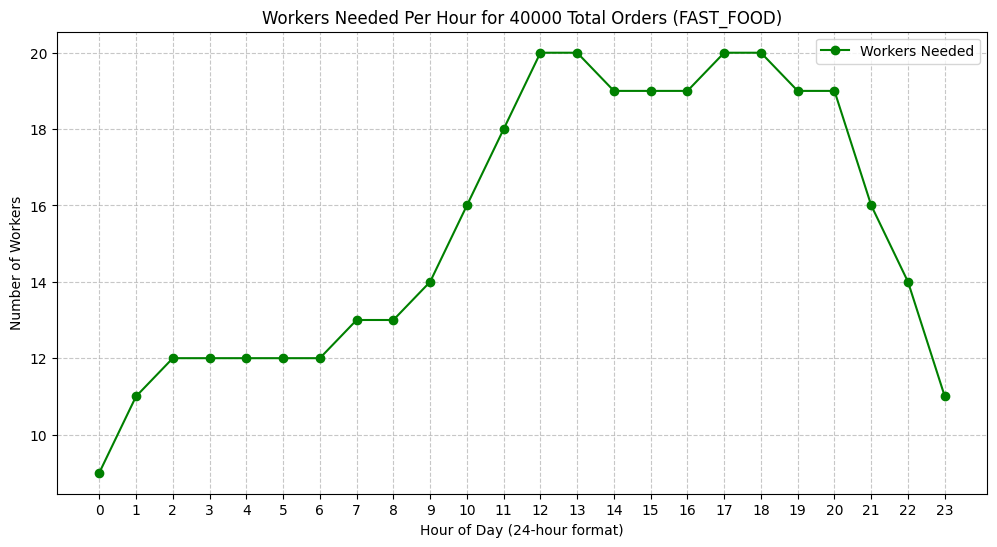

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Function to estimate workers needed per hour (Realistic Scaling)
def estimate_workers_needed(predicted_orders, base_workers=0, scale_factor=2.3, max_workers=40):
    """
    Estimate the number of workers needed per hour based on order volume.
    - `base_workers`: Minimum workers required at any time.
    - `scale_factor`: Controls rate of worker increase with demand.
    - `max_workers`: Ensures reasonable limits.
    """
    workers_needed = base_workers + np.ceil(np.log1p(predicted_orders) * scale_factor).astype(int)
    return np.clip(workers_needed, base_workers, max_workers)  # Ensure workers stay within a reasonable range

# Extract the distributed orders from df_distributed
predicted_orders = df_distributed['distributed_orders']

# Estimate workers needed with refined scaling
workers_needed = estimate_workers_needed(predicted_orders, base_workers=0, scale_factor=2.3, max_workers=50)

# Add the workers_needed column to the df_distributed dataframe
df_distributed["workers_needed"] = workers_needed

# Print the updated results to verify
print(df_distributed)

# Plot worker demand over time (Line Graph)
plt.figure(figsize=(12, 6))
plt.plot(df_distributed['hour_of_day'], workers_needed, marker='o', linestyle='-', color='green', label="Workers Needed")
plt.xlabel('Hour of Day (24-hour format)')
plt.ylabel('Number of Workers')
plt.title(f'Workers Needed Per Hour for {test_total_orders} Total Orders ({test_concept})')
plt.xticks(np.arange(0, 24, 1))
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()


Testing the model based on the total amount of workers per day, changing to 40000 orders.


Total Orders for the day: 40000
Predicted workers needed for FAST_FOOD: 25


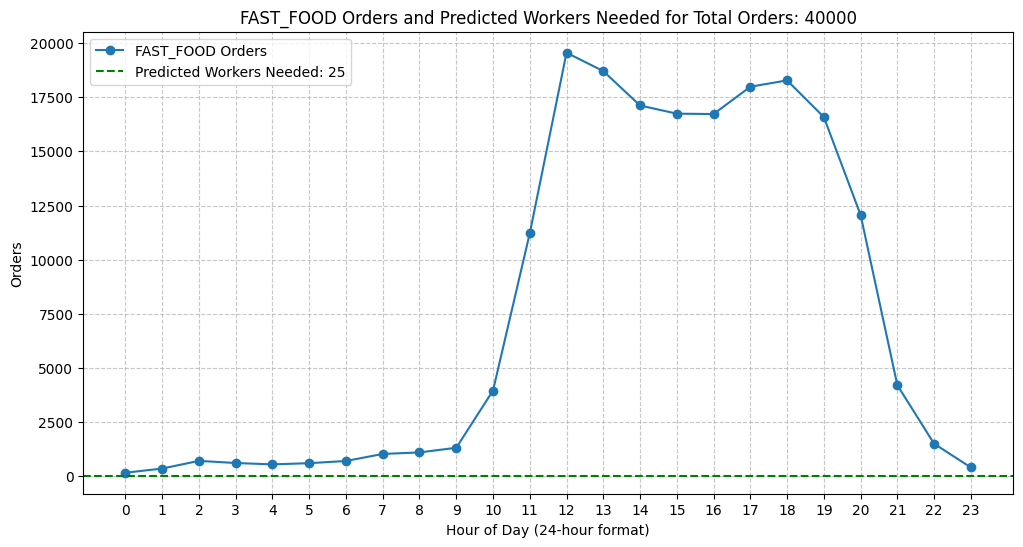

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Function to estimate workers needed based on total orders for the day
def estimate_workers_needed(total_orders, base_workers=0, scale_factor=2.3, max_workers=40):
    """
    Estimate the total number of workers needed for the day based on the total orders.
    - `base_workers`: Minimum workers required at any time.
    - `scale_factor`: Controls the rate of worker increase with demand.
    - `max_workers`: Ensures a reasonable upper limit on workers.
    """
    workers_needed = base_workers + np.ceil(np.log1p(total_orders) * scale_factor).astype(int)
    return np.clip(workers_needed, base_workers, max_workers)  # Ensure workers stay within a reasonable range

# Hourly order data for each concept
data = {
    'FAST_FOOD': [159, 352, 706, 607, 545, 599, 702, 1026, 1097, 1310, 3953, 11217, 19556, 18707, 17119, 16741, 16724, 17986, 18278, 16584, 12063, 4200, 1498, 402],
    'FINE_DINING': [211, 2898, 1485, 828, 1231, 1406, 1877, 4352, 8692, 10049, 10111, 12095, 17407, 22379, 22415, 21368, 19710, 19919, 20228, 18452, 14329, 9061, 2618, 337],
    'FOOD_TRUCK': [28, 1, 0, 0, 0, 0, 255, 769, 892, 1016, 1160, 1664, 1852, 1380, 1307, 1121, 1137, 1462, 1690, 1278, 953, 663, 207, 133],
    'HOTEL': [147, 51, 1, 2, 778, 1189, 1444, 1574, 1540, 1306, 1199, 2203, 4106, 4646, 4346, 4847, 4763, 4496, 4972, 4442, 2248, 1195, 676, 491],
    'POP_UP': [0, 0, 0, 0, 0, 0, 0, 0, 9, 15, 14, 41, 164, 139, 103, 52, 49, 23, 30, 35, 23, 36, 2, 0],
    'SPORTS_CLUB': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 6, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0]
}

# Hour of day (0 to 23)
hours = list(range(24))

# Convert the data into a DataFrame
df = pd.DataFrame(data, index=hours)

# Function to predict workers needed for the entire day based on total orders
def predict_workers_for_total_orders(concept, total_orders, scale_factor=2.3, max_workers=40):
    """
    Given a concept, predict the total number of workers needed based on the total orders for the day.
    """
    if concept not in df.columns:
        raise ValueError(f"Concept '{concept}' not found in the dataset")

    # The total orders input can be used to predict the total workers needed for the day
    workers_needed = estimate_workers_needed(total_orders, scale_factor=scale_factor, max_workers=max_workers)
    return workers_needed

# Test input value: total orders for the day
test_total_orders = 40000  # Replace with the total number of orders for the day

# Concept to test
concept = 'FAST_FOOD'  # Replace with desired concept

# Get the total number of orders for the entire day for the selected concept
total_orders = df[concept].sum()

# Predict workers needed for that total orders
predicted_workers_needed = predict_workers_for_total_orders(concept, test_total_orders)

# Print the total orders and predicted workers needed for the test input
print(f"\nTotal Orders for the day: {test_total_orders}")
print(f"Predicted workers needed for {concept}: {predicted_workers_needed}")

# Plot the prediction for workers needed per hour for the selected concept
plt.figure(figsize=(12, 6))
plt.plot(df.index, df[concept], marker='o', linestyle='-', label=f'{concept} Orders')
plt.axhline(predicted_workers_needed, color='green', linestyle='--', label=f'Predicted Workers Needed: {predicted_workers_needed}')
plt.xlabel('Hour of Day (24-hour format)')
plt.ylabel('Orders')
plt.title(f'{concept} Orders and Predicted Workers Needed for Total Orders: {test_total_orders}')
plt.xticks(np.arange(0, 24, 1))
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()


# 3. Understanding Tipping Percentage vs Hour of Day

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
# New import for RandomForestRegressor:
from sklearn.ensemble import RandomForestRegressor

# Define file paths for the datasets.
BILLS_PATH = "bills.csv"
VENUES_PATH = "venues.csv"

# Load the CSV files into DataFrames.
bills = pd.read_csv(BILLS_PATH)
venues = pd.read_csv(VENUES_PATH)

# Downcast numeric columns to save memory
for col in bills.columns:
    if bills[col].dtype == 'float64':
        bills[col] = pd.to_numeric(bills[col], downcast='float')
    elif bills[col].dtype == 'int64':
        bills[col] = pd.to_numeric(bills[col], downcast='integer')

for col in venues.columns:
    if venues[col].dtype == 'float64':
        venues[col] = pd.to_numeric(venues[col], downcast='float')
    elif venues[col].dtype == 'int64':
        venues[col] = pd.to_numeric(venues[col], downcast='integer')

# Merge bills with venues on the common key 'venue_xref_id'.
# We only need the 'city' column from venues.
df = bills.merge(venues[['venue_xref_id', 'city']], on='venue_xref_id', how='left')

# Calculate the tipping percentage:
# tipping_percentage = (bill_total_gratuity / bill_total_billed) * 100
df['tipping_percentage'] = 100 * df['bill_total_gratuity'] / df['bill_total_billed']

# Filter out extreme tipping percentages
df = df[df['tipping_percentage'] <= 200]

# Convert 'bill_paid_at_local' to datetime and extract the hour (0-23).
df['bill_paid_at_local'] = pd.to_datetime(df['bill_paid_at_local'])
df['hour'] = df['bill_paid_at_local'].dt.hour

# Filter the DataFrame to only include cities that occur more than 50 times.
city_counts = df['city'].value_counts()
valid_cities = city_counts[city_counts > 100].index
df_filtered = df[df['city'].isin(valid_cities)]

# --- Heatmap Creation ---
# Group the data by 'hour' and 'city' and calculate the average tipping percentage.
heatmap_data = df_filtered.groupby(['hour', 'city'])['tipping_percentage'].mean().unstack()

# Print the number of missing values
print(f"Number of missing values in heatmap_data: {heatmap_data.isnull().sum().sum()}")

# Plot the heatmap using seaborn with a red color map.
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap="Reds", vmin=-0, vmax=0.1)
plt.title("Average Tipping Percentage by Hour and City")
plt.xlabel("City")
plt.ylabel("Hour of Day")
plt.tight_layout()
plt.show()


# --- Original Regression Analysis using LinearRegression (Commented Out) ---
'''
# Reshape the heatmap data for regression
heatmap_data_reset = heatmap_data.reset_index()
heatmap_data_melted = heatmap_data_reset.melt(id_vars='hour', var_name='city', value_name='tipping_percentage')

# Remove NaN and infinite values
heatmap_data_melted = heatmap_data_melted.replace([np.inf, -np.inf], np.nan)
heatmap_data_melted = heatmap_data_melted.dropna()

# Define X and y
X = heatmap_data_melted[['hour']]
y = heatmap_data_melted['tipping_percentage']

# Create and fit the regression model
reg_model = LinearRegression()
reg_model.fit(X, y)

# Print the coefficients
print(f"Intercept: {reg_model.intercept_}")
print(f"Coefficient for hour: {reg_model.coef_[0]}")

# --- Regression Plot ---
# Create a plot for each city.
plt.figure(figsize=(12, 8))
colors = plt.cm.get_cmap('tab20', len(valid_cities))  # Use tab20 colormap
for i, city in enumerate(valid_cities):
    # Get the data for this city.
    city_data = heatmap_data[city].dropna()  # Drop any NaN values for the city.

    # Clean the data: remove any Inf or NaN values from X and y.
    city_data = city_data[~np.isinf(city_data)]  # Remove Inf values
    city_data = city_data.dropna()  # Remove any remaining NaN values

    # If we have data to plot, perform regression.
    if len(city_data) > 0:
        # X will be the hours (0-23) and y will be the average tipping percentage.
        X = city_data.index.values.reshape(-1, 1)  # Hour as feature.
        y = city_data.values  # Average tipping percentage as target.

        # Fit the model
        reg_model.fit(X, y)

        # Plot the regression line with different colors
        plt.plot(X, reg_model.predict(X), label=f'{city} - Regression', linestyle='--', color=colors(i))  # Regression line

plt.title("Tipping Percentage vs Hour of Day by City with Regression Lines")
plt.xlabel("Hour of Day")
plt.ylabel("Tipping Percentage")
plt.legend()
plt.tight_layout()
plt.show()
'''

# --- New Regression Analysis using RandomForestRegressor ---
# Reshape the heatmap data for regression
heatmap_data_reset = heatmap_data.reset_index()
heatmap_data_melted = heatmap_data_reset.melt(id_vars='hour', var_name='city', value_name='tipping_percentage')

# Remove NaN and infinite values
heatmap_data_melted = heatmap_data_melted.replace([np.inf, -np.inf], np.nan)
heatmap_data_melted = heatmap_data_melted.dropna()

# Define X and y
X = heatmap_data_melted[['hour']]
y = heatmap_data_melted['tipping_percentage']

# Create and fit the regression model using RandomForestRegressor
reg_model = RandomForestRegressor(n_estimators=100, random_state=42)
reg_model.fit(X, y)

# Print feature importances (note: there is only one feature here, 'hour')
print("Feature importances:", reg_model.feature_importances_)

# --- New Regression Plot using RandomForestRegressor (with Actual Values) ---
plt.figure(figsize=(12, 8))
colors = plt.cm.get_cmap('tab20', len(valid_cities))  # Use tab20 colormap for distinct colors

for i, city in enumerate(valid_cities):
    # Get the data for this city and clean it
    city_data = heatmap_data[city].dropna()
    city_data = city_data[~np.isinf(city_data)]
    city_data = city_data.dropna()

    if len(city_data) > 0:
        # Plot the actual values as scatter points
        plt.scatter(city_data.index, city_data.values, label=f'{city} - Actual', color=colors(i), s=30, alpha=0.6)

        # X will be the hours (0-23) and y will be the average tipping percentage.
        X_city = city_data.index.values.reshape(-1, 1)  # Hour as feature
        y_city = city_data.values  # Average tipping percentage as target

        # Fit the model on this city's data
        reg_model.fit(X_city, y_city)

        # Generate predictions for a smooth range of hours between 0 and 23
        hours_range = np.linspace(0, 23, 100).reshape(-1, 1)
        predictions = reg_model.predict(hours_range)

        # Plot the regression curve for this city
        plt.plot(hours_range, predictions, label=f'{city} - Regression', linestyle='--', color=colors(i))

plt.title("Tipping Percentage vs. Hour of Day by City with RandomForest Regression Lines and Actual Values")
plt.xlabel("Hour of Day")
plt.ylabel("Tipping Percentage")
plt.legend()
plt.tight_layout()
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'bills.csv'